### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [2]:
# function to check overlap:
#def sharedperc(success, feature):
#    for i in range(len(success)):
        

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ['EIN','NAME','SPECIAL_CONSIDERATIONS','ASK_AMT'], inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,1


In [4]:
# Determine the number of unique values in each column.
application_list = application_df.dtypes[application_df.dtypes != "NULL"].index.tolist()
application_df[application_list].nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
STATUS               2
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

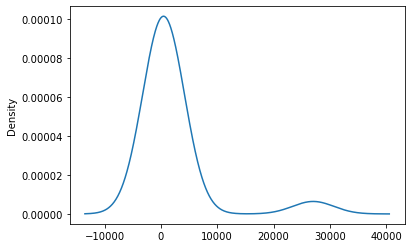

In [6]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

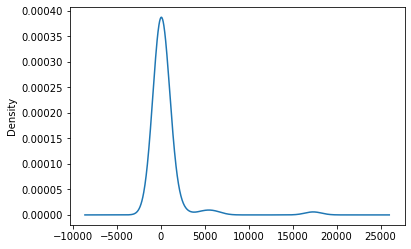

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 300].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#merged_col = merged_df.columns.values.tolist()
#print(merged_col)

In [14]:
# Merge one-hot encoded features and drop the originals
temp_to_merge_df= pd.DataFrame().assign(STATUS=application_df['STATUS'], 
                                        IS_SUCCESSFUL=application_df['IS_SUCCESSFUL'])
merged_df = pd.concat([temp_to_merge_df, encode_df], axis=1, join='inner')
merged_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
merged_col = merged_df.columns.values.tolist()
print(merged_col)

['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M']


In [16]:
coltodrop = []
for column in merged_col:
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False)
    #print(dataxtab)
    #dataxtab.plot.bar(stacked=True)
    #plt.legend(title='IS_SUCCESSFUL')
    #plt.show()
    #dataxtab = pd.crosstab(merged_df[column],merged_df['IS_SUCCESSFUL'],margins = False, normalize = 'index')
    #print(dataxtab)
    corrr = np.corrcoef(merged_df[column],merged_df['IS_SUCCESSFUL'])
    corrrr = abs(corrr[1,0])
    if corrrr < .01:
        #print(corrrr)
        coltodrop.append(column)
print(coltodrop)
coltodrop.append('IS_SUCCESSFUL')

['STATUS', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T7', 'AFFILIATION_Family/Parent', 'AFFILIATION_National', 'AFFILIATION_Regional', 'CLASSIFICATION_C2000', 'USE_CASE_Other', 'INCOME_AMT_5M-10M']


In [17]:
# Kill the noise
for col in coltodrop:
    merged_df.drop([col],1).values

In [18]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Refinement of the Model

In [20]:
victory_message = "WOOOOOOOO YEEEAAAAH BABYYY THAT'S WHAT IVE BEEN WAITING FOR!"
activation_list = ['relu','tanh']
value_list = range(60,80,10)
r_value_list = range(90,110,10)
number_input_features = len(X_train[0])
class bestest_model:
    model_accuracy = 0
    neuron_array = []
    activation_array = []
    layer_count = len(neuron_array)
for layer1 in r_value_list:
    for layer2 in value_list:
        for layer3 in value_list:
            for layer4 in value_list:
                for layer5 in value_list:
                    for act1 in activation_list:
                        for act2 in activation_list:
                            for act3 in activation_list:
                                for act4 in activation_list:
                                    for act5 in activation_list:
                                        temp_neuron_array = []
                                        temp_activation_array = []
                                        temp_neuron_array.append(layer1)
                                        temp_activation_array.append(act1)
                                        temp_neuron_array.append(layer2)
                                        temp_activation_array.append(act2)
                                        temp_neuron_array.append(layer3)
                                        temp_activation_array.append(act3)
                                        temp_neuron_array.append(layer4)
                                        temp_activation_array.append(act4)
                                        temp_neuron_array.append(layer5)
                                        temp_activation_array.append(act5)
                                        nn = tf.keras.models.Sequential()
                                        nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=act1))
                                        nn.add(tf.keras.layers.Dense(units=layer2, activation=act2))
                                        nn.add(tf.keras.layers.Dense(units=layer3, activation=act3))
                                        nn.add(tf.keras.layers.Dense(units=layer4, activation=act4))
                                        nn.add(tf.keras.layers.Dense(units=layer5, activation=act5))
                                        nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
                                        nn.summary()
                                        nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
                                        fit_model = nn.fit(X_train,y_train,epochs=10,verbose=0)
                                        model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
                                        print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
                                        if model_accuracy > bestest_model.model_accuracy:
                                            bestest_model.neuron_array = temp_neuron_array
                                            bestest_model.activation_array = temp_activation_array
                                            bestest_model.model_accuracy = model_accuracy
                                            bestest_model.layer_count = len(bestest_model.neuron_array)
                                            print("new best model")
                                        else:
                                            print("Oh bother")
                                        print('*'*75)
                                        if model_accuracy > .75:
                                            break
                                    if model_accuracy > .75:
                                        break
                                if model_accuracy > .75:
                                    break
                            if model_accuracy > .75:
                                break
                        if model_accuracy > .75:
                            break
                    if model_accuracy > .75:
                        break
                if model_accuracy > .75:
                    break
            if model_accuracy > .75:
                break
        if model_accuracy > .75:
            break
    if model_accuracy > .75:
        break
def display_model_stats (model):
    print(model.neuron_array)
    print(model.activation_array)
    print(model.model_accuracy)
    print(model.layer_count)
print("best model stats:")
display_model_stats(bestest_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                3780      
                                                                 
 dense_1 (Dense)             (None, 60)                5460      
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 60)                3660      
                                                                 
 dense_4 (Dense)             (None, 60)                3660      
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 20,281
Trainable params: 20,281
Non-traina

Total params: 20,281
Trainable params: 20,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6649 - accuracy: 0.7097 - 265ms/epoch - 990us/step
Loss: 0.6649371981620789, Accuracy: 0.7097375988960266
new best model
***************************************************************************
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 90)                3780      
                                                                 
 dense_37 (Dense)            (None, 60)                5460      
                                                                 
 dense_38 (Dense)            (None, 60)                3660      
                                                                 
 dense_39 (Dense)            (None, 60)                3660      
                            

 dense_70 (Dense)            (None, 60)                3660      
                                                                 
 dense_71 (Dense)            (None, 1)                 61        
                                                                 
Total params: 20,281
Trainable params: 20,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6362 - accuracy: 0.7174 - 276ms/epoch - 1ms/step
Loss: 0.6362048983573914, Accuracy: 0.7174344062805176
new best model
***************************************************************************
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 90)                3780      
                                                                 
 dense_73 (Dense)            (None, 60)                5460      
                             

                                                                 
 dense_104 (Dense)           (None, 60)                3660      
                                                                 
 dense_105 (Dense)           (None, 60)                3660      
                                                                 
 dense_106 (Dense)           (None, 60)                3660      
                                                                 
 dense_107 (Dense)           (None, 1)                 61        
                                                                 
Total params: 20,281
Trainable params: 20,281
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6364 - accuracy: 0.7174 - 270ms/epoch - 1ms/step
Loss: 0.6364421248435974, Accuracy: 0.7174344062805176
Oh bother
***************************************************************************
Model: "sequential_18"
__________________________________

 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 90)                3780      
                                                                 
 dense_139 (Dense)           (None, 60)                5460      
                                                                 
 dense_140 (Dense)           (None, 60)                3660      
                                                                 
 dense_141 (Dense)           (None, 60)                3660      
                                                                 
 dense_142 (Dense)           (None, 60)                3660      
                                                                 
 dense_143 (Dense)           (None, 1)                 61        
                                                                 
Total params: 20,281
Trainable params: 20,281
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.5752 - accuracy: 0.7158 - 274ms/epoch - 1ms/step
Loss: 0.5752091407775879, Accuracy: 0.7158017754554749
Oh bother
***************************************************************************
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 90)                3780      
                                                                 
 dense_175 (Dense)           (None, 60)                5460      
                                                                 
 dense_176 (Dense)           (None, 60)                3660      
                                                                 
 dense_177 (Dense)           (None, 60)                3660      
                                                                 
 dense_178 (Dense)           (None, 60

                                                                 
 dense_209 (Dense)           (None, 1)                 71        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7193 - accuracy: 0.6838 - 278ms/epoch - 1ms/step
Loss: 0.7192880511283875, Accuracy: 0.6838483810424805
Oh bother
***************************************************************************
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 90)                3780      
                                                                 
 dense_211 (Dense)           (None, 60)                5460      
                                                                 
 dense_212 (Dense)           (None

 dense_242 (Dense)           (None, 60)                3660      
                                                                 
 dense_243 (Dense)           (None, 60)                3660      
                                                                 
 dense_244 (Dense)           (None, 70)                4270      
                                                                 
 dense_245 (Dense)           (None, 1)                 71        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7434 - accuracy: 0.7187 - 277ms/epoch - 1ms/step
Loss: 0.743389368057251, Accuracy: 0.7187172174453735
Oh bother
***************************************************************************
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output

 dense_276 (Dense)           (None, 90)                3780      
                                                                 
 dense_277 (Dense)           (None, 60)                5460      
                                                                 
 dense_278 (Dense)           (None, 60)                3660      
                                                                 
 dense_279 (Dense)           (None, 60)                3660      
                                                                 
 dense_280 (Dense)           (None, 70)                4270      
                                                                 
 dense_281 (Dense)           (None, 1)                 71        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6237 - accuracy: 0.6735 - 268ms/epoch - 1ms/step


268/268 - 0s - loss: 0.6044 - accuracy: 0.6920 - 278ms/epoch - 1ms/step
Loss: 0.6043877601623535, Accuracy: 0.6920116543769836
Oh bother
***************************************************************************
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 90)                3780      
                                                                 
 dense_313 (Dense)           (None, 60)                5460      
                                                                 
 dense_314 (Dense)           (None, 60)                3660      
                                                                 
 dense_315 (Dense)           (None, 60)                3660      
                                                                 
 dense_316 (Dense)           (None, 70)                4270      
                                      

 dense_347 (Dense)           (None, 1)                 71        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6105 - accuracy: 0.7191 - 295ms/epoch - 1ms/step
Loss: 0.6105354428291321, Accuracy: 0.7190670371055603
Oh bother
***************************************************************************
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_348 (Dense)           (None, 90)                3780      
                                                                 
 dense_349 (Dense)           (None, 60)                5460      
                                                                 
 dense_350 (Dense)           (None, 60)                3660      
                                  

                                                                 
 dense_381 (Dense)           (None, 60)                3660      
                                                                 
 dense_382 (Dense)           (None, 70)                4270      
                                                                 
 dense_383 (Dense)           (None, 1)                 71        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5861 - accuracy: 0.7125 - 305ms/epoch - 1ms/step
Loss: 0.5860636830329895, Accuracy: 0.7125364542007446
Oh bother
***************************************************************************
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None

 dense_414 (Dense)           (None, 90)                3780      
                                                                 
 dense_415 (Dense)           (None, 60)                5460      
                                                                 
 dense_416 (Dense)           (None, 60)                3660      
                                                                 
 dense_417 (Dense)           (None, 70)                4270      
                                                                 
 dense_418 (Dense)           (None, 60)                4260      
                                                                 
 dense_419 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6805 - accuracy: 0.7244 - 286ms/epoch - 1ms/step


Loss: 0.7699703574180603, Accuracy: 0.6370845437049866
Oh bother
***************************************************************************
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_450 (Dense)           (None, 90)                3780      
                                                                 
 dense_451 (Dense)           (None, 60)                5460      
                                                                 
 dense_452 (Dense)           (None, 60)                3660      
                                                                 
 dense_453 (Dense)           (None, 70)                4270      
                                                                 
 dense_454 (Dense)           (None, 60)                4260      
                                                                 
 dense_455 (Dense)           (None, 1)      

                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6701 - accuracy: 0.6932 - 273ms/epoch - 1ms/step
Loss: 0.6700708866119385, Accuracy: 0.6931778192520142
Oh bother
***************************************************************************
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_486 (Dense)           (None, 90)                3780      
                                                                 
 dense_487 (Dense)           (None, 60)                5460      
                                                                 
 dense_488 (Dense)           (None, 60)                3660      
                                                                 
 dense_489 (Dense)           (None

 dense_519 (Dense)           (None, 70)                4270      
                                                                 
 dense_520 (Dense)           (None, 60)                4260      
                                                                 
 dense_521 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5947 - accuracy: 0.7088 - 297ms/epoch - 1ms/step
Loss: 0.5947329998016357, Accuracy: 0.7088046669960022
Oh bother
***************************************************************************
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_522 (Dense)           (None, 90)                3780      
                                  

                                                                 
 dense_553 (Dense)           (None, 60)                5460      
                                                                 
 dense_554 (Dense)           (None, 60)                3660      
                                                                 
 dense_555 (Dense)           (None, 70)                4270      
                                                                 
 dense_556 (Dense)           (None, 60)                4260      
                                                                 
 dense_557 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5798 - accuracy: 0.7222 - 292ms/epoch - 1ms/step
Loss: 0.5797854065895081, Accuracy: 0.7222157716751099
Oh bother
*

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_588 (Dense)           (None, 90)                3780      
                                                                 
 dense_589 (Dense)           (None, 60)                5460      
                                                                 
 dense_590 (Dense)           (None, 60)                3660      
                                                                 
 dense_591 (Dense)           (None, 70)                4270      
                                                                 
 dense_592 (Dense)           (None, 70)                4970      
                                                                 
 dense_593 (Dense)           (None, 1)                 71        
                                                                 
Total params: 22,211
Trainable params: 22,211
Non-trainable params: 0
______

Total params: 22,211
Trainable params: 22,211
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6518 - accuracy: 0.7159 - 297ms/epoch - 1ms/step
Loss: 0.6518288254737854, Accuracy: 0.7159183621406555
Oh bother
***************************************************************************
Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_624 (Dense)           (None, 90)                3780      
                                                                 
 dense_625 (Dense)           (None, 60)                5460      
                                                                 
 dense_626 (Dense)           (None, 60)                3660      
                                                                 
 dense_627 (Dense)           (None, 70)                4270      
                                 

 dense_658 (Dense)           (None, 70)                4970      
                                                                 
 dense_659 (Dense)           (None, 1)                 71        
                                                                 
Total params: 22,211
Trainable params: 22,211
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6633 - accuracy: 0.6778 - 296ms/epoch - 1ms/step
Loss: 0.6633185148239136, Accuracy: 0.677784264087677
Oh bother
***************************************************************************
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_660 (Dense)           (None, 90)                3780      
                                                                 
 dense_661 (Dense)           (None, 60)                5460      
                                  

                                                                 
 dense_692 (Dense)           (None, 60)                3660      
                                                                 
 dense_693 (Dense)           (None, 70)                4270      
                                                                 
 dense_694 (Dense)           (None, 70)                4970      
                                                                 
 dense_695 (Dense)           (None, 1)                 71        
                                                                 
Total params: 22,211
Trainable params: 22,211
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6099 - accuracy: 0.7188 - 274ms/epoch - 1ms/step
Loss: 0.6099290251731873, Accuracy: 0.7188338041305542
Oh bother
***************************************************************************
Model: "sequential_116"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_726 (Dense)           (None, 90)                3780      
                                                                 
 dense_727 (Dense)           (None, 60)                5460      
                                                                 
 dense_728 (Dense)           (None, 60)                3660      
                                                                 
 dense_729 (Dense)           (None, 70)                4270      
                                                                 
 dense_730 (Dense)           (None, 70)                4970      
                                                                 
 dense_731 (Dense)           (None, 1)                 71        
                                                                 
Total params: 22,211
Trainable params: 22,211
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.5736 - accuracy: 0.7245 - 298ms/epoch - 1ms/step
Loss: 0.5736477375030518, Accuracy: 0.7245481014251709
Oh bother
***************************************************************************
Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_762 (Dense)           (None, 90)                3780      
                                                                 
 dense_763 (Dense)           (None, 60)                5460      
                                                                 
 dense_764 (Dense)           (None, 60)                3660      
                                                                 
 dense_765 (Dense)           (None, 70)                4270      
                                                                 
 dense_766 (Dense)           (None, 7

                                                                 
 dense_797 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7030 - accuracy: 0.7301 - 348ms/epoch - 1ms/step
Loss: 0.7029526233673096, Accuracy: 0.7301457524299622
Oh bother
***************************************************************************
Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_798 (Dense)           (None, 90)                3780      
                                                                 
 dense_799 (Dense)           (None, 60)                5460      
                                                                 
 dense_800 (Dense)           (Non

 dense_830 (Dense)           (None, 70)                4270      
                                                                 
 dense_831 (Dense)           (None, 60)                4260      
                                                                 
 dense_832 (Dense)           (None, 60)                3660      
                                                                 
 dense_833 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7273 - accuracy: 0.6603 - 285ms/epoch - 1ms/step
Loss: 0.7273173332214355, Accuracy: 0.6602915525436401
Oh bother
***************************************************************************
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Outp

 dense_864 (Dense)           (None, 90)                3780      
                                                                 
 dense_865 (Dense)           (None, 60)                5460      
                                                                 
 dense_866 (Dense)           (None, 70)                4270      
                                                                 
 dense_867 (Dense)           (None, 60)                4260      
                                                                 
 dense_868 (Dense)           (None, 60)                3660      
                                                                 
 dense_869 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7176 - accuracy: 0.7241 - 285ms/epoch - 1ms/step


268/268 - 0s - loss: 0.6286 - accuracy: 0.6970 - 275ms/epoch - 1ms/step
Loss: 0.6285673975944519, Accuracy: 0.697026252746582
Oh bother
***************************************************************************
Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_900 (Dense)           (None, 90)                3780      
                                                                 
 dense_901 (Dense)           (None, 60)                5460      
                                                                 
 dense_902 (Dense)           (None, 70)                4270      
                                                                 
 dense_903 (Dense)           (None, 60)                4260      
                                                                 
 dense_904 (Dense)           (None, 60)                3660      
                                      

 dense_935 (Dense)           (None, 1)                 61        
                                                                 
Total params: 21,491
Trainable params: 21,491
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6321 - accuracy: 0.6469 - 283ms/epoch - 1ms/step
Loss: 0.6321182250976562, Accuracy: 0.6468804478645325
Oh bother
***************************************************************************
Model: "sequential_156"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_936 (Dense)           (None, 90)                3780      
                                                                 
 dense_937 (Dense)           (None, 60)                5460      
                                                                 
 dense_938 (Dense)           (None, 70)                4270      
                                 

                                                                 
 dense_969 (Dense)           (None, 60)                4260      
                                                                 
 dense_970 (Dense)           (None, 70)                4270      
                                                                 
 dense_971 (Dense)           (None, 1)                 71        
                                                                 
Total params: 22,111
Trainable params: 22,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8015 - accuracy: 0.7195 - 272ms/epoch - 1ms/step
Loss: 0.80148845911026, Accuracy: 0.7195335030555725
Oh bother
***************************************************************************
Model: "sequential_162"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_972 (Dense)           (None,

 dense_1002 (Dense)          (None, 90)                3780      
                                                                 
 dense_1003 (Dense)          (None, 60)                5460      
                                                                 
 dense_1004 (Dense)          (None, 70)                4270      
                                                                 
 dense_1005 (Dense)          (None, 60)                4260      
                                                                 
 dense_1006 (Dense)          (None, 70)                4270      
                                                                 
 dense_1007 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,111
Trainable params: 22,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8116 - accuracy: 0.6408 - 292ms/epoch - 1ms/step


Loss: 0.8210055232048035, Accuracy: 0.7202332615852356
Oh bother
***************************************************************************
Model: "sequential_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1038 (Dense)          (None, 90)                3780      
                                                                 
 dense_1039 (Dense)          (None, 60)                5460      
                                                                 
 dense_1040 (Dense)          (None, 70)                4270      
                                                                 
 dense_1041 (Dense)          (None, 60)                4260      
                                                                 
 dense_1042 (Dense)          (None, 70)                4270      
                                                                 
 dense_1043 (Dense)          (None, 1)     

                                                                 
Total params: 22,111
Trainable params: 22,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6352 - accuracy: 0.7053 - 283ms/epoch - 1ms/step
Loss: 0.635165274143219, Accuracy: 0.7053061127662659
Oh bother
***************************************************************************
Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1074 (Dense)          (None, 90)                3780      
                                                                 
 dense_1075 (Dense)          (None, 60)                5460      
                                                                 
 dense_1076 (Dense)          (None, 70)                4270      
                                                                 
 dense_1077 (Dense)          (None

 dense_1107 (Dense)          (None, 60)                4260      
                                                                 
 dense_1108 (Dense)          (None, 70)                4270      
                                                                 
 dense_1109 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,111
Trainable params: 22,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6180 - accuracy: 0.6896 - 282ms/epoch - 1ms/step
Loss: 0.6179600954055786, Accuracy: 0.6895626783370972
Oh bother
***************************************************************************
Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1110 (Dense)          (None, 90)                3780      
                                 

                                                                 
 dense_1141 (Dense)          (None, 60)                5460      
                                                                 
 dense_1142 (Dense)          (None, 70)                4270      
                                                                 
 dense_1143 (Dense)          (None, 60)                4260      
                                                                 
 dense_1144 (Dense)          (None, 70)                4270      
                                                                 
 dense_1145 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,111
Trainable params: 22,111
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5822 - accuracy: 0.7040 - 291ms/epoch - 1ms/step
Loss: 0.5822278261184692, Accuracy: 0.7040233016014099
Oh bother
*

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1176 (Dense)          (None, 90)                3780      
                                                                 
 dense_1177 (Dense)          (None, 60)                5460      
                                                                 
 dense_1178 (Dense)          (None, 70)                4270      
                                                                 
 dense_1179 (Dense)          (None, 70)                4970      
                                                                 
 dense_1180 (Dense)          (None, 60)                4260      
                                                                 
 dense_1181 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
______

Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6578 - accuracy: 0.6896 - 281ms/epoch - 1ms/step
Loss: 0.6577826142311096, Accuracy: 0.6895626783370972
Oh bother
***************************************************************************
Model: "sequential_202"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1212 (Dense)          (None, 90)                3780      
                                                                 
 dense_1213 (Dense)          (None, 60)                5460      
                                                                 
 dense_1214 (Dense)          (None, 70)                4270      
                                                                 
 dense_1215 (Dense)          (None, 70)                4970      
                                 

 dense_1246 (Dense)          (None, 60)                4260      
                                                                 
 dense_1247 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6367 - accuracy: 0.6714 - 293ms/epoch - 1ms/step
Loss: 0.6366750001907349, Accuracy: 0.671370267868042
Oh bother
***************************************************************************
Model: "sequential_208"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1248 (Dense)          (None, 90)                3780      
                                                                 
 dense_1249 (Dense)          (None, 60)                5460      
                                  

                                                                 
 dense_1280 (Dense)          (None, 70)                4270      
                                                                 
 dense_1281 (Dense)          (None, 70)                4970      
                                                                 
 dense_1282 (Dense)          (None, 60)                4260      
                                                                 
 dense_1283 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6496 - accuracy: 0.6398 - 283ms/epoch - 1ms/step
Loss: 0.6496475338935852, Accuracy: 0.6397667527198792
Oh bother
***************************************************************************
Model: "sequential_214"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_1314 (Dense)          (None, 90)                3780      
                                                                 
 dense_1315 (Dense)          (None, 60)                5460      
                                                                 
 dense_1316 (Dense)          (None, 70)                4270      
                                                                 
 dense_1317 (Dense)          (None, 70)                4970      
                                                                 
 dense_1318 (Dense)          (None, 60)                4260      
                                                                 
 dense_1319 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 1.6723 - accuracy: 0.7086 - 306ms/epoch - 1ms/step
Loss: 1.672317624092102, Accuracy: 0.7085714340209961
Oh bother
***************************************************************************
Model: "sequential_225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1350 (Dense)          (None, 90)                3780      
                                                                 
 dense_1351 (Dense)          (None, 60)                5460      
                                                                 
 dense_1352 (Dense)          (None, 70)                4270      
                                                                 
 dense_1353 (Dense)          (None, 70)                4970      
                                                                 
 dense_1354 (Dense)          (None, 70

                                                                 
 dense_1385 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,521
Trainable params: 23,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8027 - accuracy: 0.6348 - 295ms/epoch - 1ms/step
Loss: 0.8027337789535522, Accuracy: 0.6347522139549255
Oh bother
***************************************************************************
Model: "sequential_231"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1386 (Dense)          (None, 90)                3780      
                                                                 
 dense_1387 (Dense)          (None, 60)                5460      
                                                                 
 dense_1388 (Dense)          (Non

 dense_1418 (Dense)          (None, 70)                4270      
                                                                 
 dense_1419 (Dense)          (None, 70)                4970      
                                                                 
 dense_1420 (Dense)          (None, 70)                4970      
                                                                 
 dense_1421 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,521
Trainable params: 23,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6867 - accuracy: 0.6929 - 286ms/epoch - 1ms/step
Loss: 0.6866745352745056, Accuracy: 0.6929445862770081
Oh bother
***************************************************************************
Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Outp

 dense_1452 (Dense)          (None, 90)                3780      
                                                                 
 dense_1453 (Dense)          (None, 60)                5460      
                                                                 
 dense_1454 (Dense)          (None, 70)                4270      
                                                                 
 dense_1455 (Dense)          (None, 70)                4970      
                                                                 
 dense_1456 (Dense)          (None, 70)                4970      
                                                                 
 dense_1457 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,521
Trainable params: 23,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6721 - accuracy: 0.7219 - 297ms/epoch - 1ms/step


268/268 - 0s - loss: 0.6434 - accuracy: 0.6970 - 288ms/epoch - 1ms/step
Loss: 0.6434360146522522, Accuracy: 0.697026252746582
Oh bother
***************************************************************************
Model: "sequential_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1488 (Dense)          (None, 90)                3780      
                                                                 
 dense_1489 (Dense)          (None, 60)                5460      
                                                                 
 dense_1490 (Dense)          (None, 70)                4270      
                                                                 
 dense_1491 (Dense)          (None, 70)                4970      
                                                                 
 dense_1492 (Dense)          (None, 70)                4970      
                                      

 dense_1523 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,521
Trainable params: 23,521
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5824 - accuracy: 0.7159 - 351ms/epoch - 1ms/step
Loss: 0.5824161767959595, Accuracy: 0.7159183621406555
Oh bother
***************************************************************************
Model: "sequential_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1524 (Dense)          (None, 90)                3780      
                                                                 
 dense_1525 (Dense)          (None, 60)                5460      
                                                                 
 dense_1526 (Dense)          (None, 70)                4270      
                                 

                                                                 
 dense_1557 (Dense)          (None, 60)                3660      
                                                                 
 dense_1558 (Dense)          (None, 60)                3660      
                                                                 
 dense_1559 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,791
Trainable params: 21,791
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7064 - accuracy: 0.6823 - 380ms/epoch - 1ms/step
Loss: 0.7063974738121033, Accuracy: 0.6823323369026184
Oh bother
***************************************************************************
Model: "sequential_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1560 (Dense)          (Non

 dense_1590 (Dense)          (None, 90)                3780      
                                                                 
 dense_1591 (Dense)          (None, 70)                6370      
                                                                 
 dense_1592 (Dense)          (None, 60)                4260      
                                                                 
 dense_1593 (Dense)          (None, 60)                3660      
                                                                 
 dense_1594 (Dense)          (None, 60)                3660      
                                                                 
 dense_1595 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,791
Trainable params: 21,791
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7329 - accuracy: 0.6590 - 299ms/epoch - 1ms/step


Loss: 0.6120601296424866, Accuracy: 0.7033236026763916
Oh bother
***************************************************************************
Model: "sequential_271"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1626 (Dense)          (None, 90)                3780      
                                                                 
 dense_1627 (Dense)          (None, 70)                6370      
                                                                 
 dense_1628 (Dense)          (None, 60)                4260      
                                                                 
 dense_1629 (Dense)          (None, 60)                3660      
                                                                 
 dense_1630 (Dense)          (None, 60)                3660      
                                                                 
 dense_1631 (Dense)          (None, 1)     

                                                                 
Total params: 21,791
Trainable params: 21,791
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6721 - accuracy: 0.6973 - 285ms/epoch - 1ms/step
Loss: 0.6721404194831848, Accuracy: 0.6972594857215881
Oh bother
***************************************************************************
Model: "sequential_277"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1662 (Dense)          (None, 90)                3780      
                                                                 
 dense_1663 (Dense)          (None, 70)                6370      
                                                                 
 dense_1664 (Dense)          (None, 60)                4260      
                                                                 
 dense_1665 (Dense)          (Non

 dense_1695 (Dense)          (None, 60)                3660      
                                                                 
 dense_1696 (Dense)          (None, 60)                3660      
                                                                 
 dense_1697 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,791
Trainable params: 21,791
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6021 - accuracy: 0.6767 - 292ms/epoch - 1ms/step
Loss: 0.6021483540534973, Accuracy: 0.6767346858978271
Oh bother
***************************************************************************
Model: "sequential_283"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1698 (Dense)          (None, 90)                3780      
                                 

                                                                 
 dense_1729 (Dense)          (None, 70)                6370      
                                                                 
 dense_1730 (Dense)          (None, 60)                4260      
                                                                 
 dense_1731 (Dense)          (None, 60)                3660      
                                                                 
 dense_1732 (Dense)          (None, 70)                4270      
                                                                 
 dense_1733 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.1977 - accuracy: 0.6790 - 282ms/epoch - 1ms/step
Loss: 1.1976637840270996, Accuracy: 0.6789504289627075
Oh bother
*

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1764 (Dense)          (None, 90)                3780      
                                                                 
 dense_1765 (Dense)          (None, 70)                6370      
                                                                 
 dense_1766 (Dense)          (None, 60)                4260      
                                                                 
 dense_1767 (Dense)          (None, 60)                3660      
                                                                 
 dense_1768 (Dense)          (None, 70)                4270      
                                                                 
 dense_1769 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
______

Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6478 - accuracy: 0.6693 - 284ms/epoch - 1ms/step
Loss: 0.6478393077850342, Accuracy: 0.6692711114883423
Oh bother
***************************************************************************
Model: "sequential_300"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1800 (Dense)          (None, 90)                3780      
                                                                 
 dense_1801 (Dense)          (None, 70)                6370      
                                                                 
 dense_1802 (Dense)          (None, 60)                4260      
                                                                 
 dense_1803 (Dense)          (None, 60)                3660      
                                 

 dense_1834 (Dense)          (None, 70)                4270      
                                                                 
 dense_1835 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6071 - accuracy: 0.7194 - 326ms/epoch - 1ms/step
Loss: 0.6071414351463318, Accuracy: 0.7194169163703918
Oh bother
***************************************************************************
Model: "sequential_306"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1836 (Dense)          (None, 90)                3780      
                                                                 
 dense_1837 (Dense)          (None, 70)                6370      
                                 

                                                                 
 dense_1868 (Dense)          (None, 60)                4260      
                                                                 
 dense_1869 (Dense)          (None, 60)                3660      
                                                                 
 dense_1870 (Dense)          (None, 70)                4270      
                                                                 
 dense_1871 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6021 - accuracy: 0.6985 - 277ms/epoch - 1ms/step
Loss: 0.6020745635032654, Accuracy: 0.6985422968864441
Oh bother
***************************************************************************
Model: "sequential_312"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_1902 (Dense)          (None, 90)                3780      
                                                                 
 dense_1903 (Dense)          (None, 70)                6370      
                                                                 
 dense_1904 (Dense)          (None, 60)                4260      
                                                                 
 dense_1905 (Dense)          (None, 60)                3660      
                                                                 
 dense_1906 (Dense)          (None, 70)                4270      
                                                                 
 dense_1907 (Dense)          (None, 1)                 71        
                                                                 
Total params: 22,411
Trainable params: 22,411
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.8005 - accuracy: 0.6734 - 294ms/epoch - 1ms/step
Loss: 0.8004793524742126, Accuracy: 0.6733527779579163
Oh bother
***************************************************************************
Model: "sequential_323"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1938 (Dense)          (None, 90)                3780      
                                                                 
 dense_1939 (Dense)          (None, 70)                6370      
                                                                 
 dense_1940 (Dense)          (None, 60)                4260      
                                                                 
 dense_1941 (Dense)          (None, 70)                4270      
                                                                 
 dense_1942 (Dense)          (None, 6

                                                                 
 dense_1973 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8231 - accuracy: 0.6856 - 286ms/epoch - 1ms/step
Loss: 0.8231222033500671, Accuracy: 0.6855976581573486
Oh bother
***************************************************************************
Model: "sequential_329"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1974 (Dense)          (None, 90)                3780      
                                                                 
 dense_1975 (Dense)          (None, 70)                6370      
                                                                 
 dense_1976 (Dense)          (Non

 dense_2006 (Dense)          (None, 60)                4260      
                                                                 
 dense_2007 (Dense)          (None, 70)                4270      
                                                                 
 dense_2008 (Dense)          (None, 60)                4260      
                                                                 
 dense_2009 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6735 - accuracy: 0.6906 - 287ms/epoch - 1ms/step
Loss: 0.6735458374023438, Accuracy: 0.690612256526947
Oh bother
***************************************************************************
Model: "sequential_335"
_________________________________________________________________
 Layer (type)                Outpu

 dense_2040 (Dense)          (None, 90)                3780      
                                                                 
 dense_2041 (Dense)          (None, 70)                6370      
                                                                 
 dense_2042 (Dense)          (None, 60)                4260      
                                                                 
 dense_2043 (Dense)          (None, 70)                4270      
                                                                 
 dense_2044 (Dense)          (None, 60)                4260      
                                                                 
 dense_2045 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6832 - accuracy: 0.6953 - 290ms/epoch - 1ms/step


268/268 - 0s - loss: 0.5992 - accuracy: 0.7034 - 292ms/epoch - 1ms/step
Loss: 0.5991930961608887, Accuracy: 0.703440248966217
Oh bother
***************************************************************************
Model: "sequential_346"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2076 (Dense)          (None, 90)                3780      
                                                                 
 dense_2077 (Dense)          (None, 70)                6370      
                                                                 
 dense_2078 (Dense)          (None, 60)                4260      
                                                                 
 dense_2079 (Dense)          (None, 70)                4270      
                                                                 
 dense_2080 (Dense)          (None, 60)                4260      
                                      

 dense_2111 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5745 - accuracy: 0.7186 - 292ms/epoch - 1ms/step
Loss: 0.5745304226875305, Accuracy: 0.7186005711555481
Oh bother
***************************************************************************
Model: "sequential_352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2112 (Dense)          (None, 90)                3780      
                                                                 
 dense_2113 (Dense)          (None, 70)                6370      
                                                                 
 dense_2114 (Dense)          (None, 60)                4260      
                                 

                                                                 
 dense_2145 (Dense)          (None, 70)                4270      
                                                                 
 dense_2146 (Dense)          (None, 70)                4970      
                                                                 
 dense_2147 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8268 - accuracy: 0.6771 - 270ms/epoch - 1ms/step
Loss: 0.8267736434936523, Accuracy: 0.6770845651626587
Oh bother
***************************************************************************
Model: "sequential_358"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2148 (Dense)          (Non

 dense_2178 (Dense)          (None, 90)                3780      
                                                                 
 dense_2179 (Dense)          (None, 70)                6370      
                                                                 
 dense_2180 (Dense)          (None, 60)                4260      
                                                                 
 dense_2181 (Dense)          (None, 70)                4270      
                                                                 
 dense_2182 (Dense)          (None, 70)                4970      
                                                                 
 dense_2183 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7279 - accuracy: 0.6906 - 291ms/epoch - 1ms/step


Loss: 0.7110333442687988, Accuracy: 0.704256534576416
Oh bother
***************************************************************************
Model: "sequential_369"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2214 (Dense)          (None, 90)                3780      
                                                                 
 dense_2215 (Dense)          (None, 70)                6370      
                                                                 
 dense_2216 (Dense)          (None, 60)                4260      
                                                                 
 dense_2217 (Dense)          (None, 70)                4270      
                                                                 
 dense_2218 (Dense)          (None, 70)                4970      
                                                                 
 dense_2219 (Dense)          (None, 1)      

                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6193 - accuracy: 0.6982 - 275ms/epoch - 1ms/step
Loss: 0.6193183660507202, Accuracy: 0.6981924176216125
Oh bother
***************************************************************************
Model: "sequential_375"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2250 (Dense)          (None, 90)                3780      
                                                                 
 dense_2251 (Dense)          (None, 70)                6370      
                                                                 
 dense_2252 (Dense)          (None, 60)                4260      
                                                                 
 dense_2253 (Dense)          (Non

 dense_2283 (Dense)          (None, 70)                4270      
                                                                 
 dense_2284 (Dense)          (None, 70)                4970      
                                                                 
 dense_2285 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5860 - accuracy: 0.7212 - 292ms/epoch - 1ms/step
Loss: 0.5859993100166321, Accuracy: 0.72116619348526
Oh bother
***************************************************************************
Model: "sequential_381"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2286 (Dense)          (None, 90)                3780      
                                   

                                                                 
 dense_2317 (Dense)          (None, 70)                6370      
                                                                 
 dense_2318 (Dense)          (None, 70)                4970      
                                                                 
 dense_2319 (Dense)          (None, 60)                4260      
                                                                 
 dense_2320 (Dense)          (None, 60)                3660      
                                                                 
 dense_2321 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8111 - accuracy: 0.6820 - 289ms/epoch - 1ms/step
Loss: 0.811087429523468, Accuracy: 0.6819825172424316
Oh bother
**

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2352 (Dense)          (None, 90)                3780      
                                                                 
 dense_2353 (Dense)          (None, 70)                6370      
                                                                 
 dense_2354 (Dense)          (None, 70)                4970      
                                                                 
 dense_2355 (Dense)          (None, 60)                4260      
                                                                 
 dense_2356 (Dense)          (None, 60)                3660      
                                                                 
 dense_2357 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
______

Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6717 - accuracy: 0.6827 - 327ms/epoch - 1ms/step
Loss: 0.6717140078544617, Accuracy: 0.68268221616745
Oh bother
***************************************************************************
Model: "sequential_398"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2388 (Dense)          (None, 90)                3780      
                                                                 
 dense_2389 (Dense)          (None, 70)                6370      
                                                                 
 dense_2390 (Dense)          (None, 70)                4970      
                                                                 
 dense_2391 (Dense)          (None, 60)                4260      
                                   

 dense_2422 (Dense)          (None, 60)                3660      
                                                                 
 dense_2423 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5980 - accuracy: 0.7109 - 287ms/epoch - 1ms/step
Loss: 0.5979894399642944, Accuracy: 0.7109037637710571
Oh bother
***************************************************************************
Model: "sequential_404"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2424 (Dense)          (None, 90)                3780      
                                                                 
 dense_2425 (Dense)          (None, 70)                6370      
                                 

                                                                 
 dense_2456 (Dense)          (None, 70)                4970      
                                                                 
 dense_2457 (Dense)          (None, 60)                4260      
                                                                 
 dense_2458 (Dense)          (None, 60)                3660      
                                                                 
 dense_2459 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6135 - accuracy: 0.6890 - 279ms/epoch - 1ms/step
Loss: 0.6135202646255493, Accuracy: 0.6889795660972595
Oh bother
***************************************************************************
Model: "sequential_410"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_2490 (Dense)          (None, 90)                3780      
                                                                 
 dense_2491 (Dense)          (None, 70)                6370      
                                                                 
 dense_2492 (Dense)          (None, 70)                4970      
                                                                 
 dense_2493 (Dense)          (None, 60)                4260      
                                                                 
 dense_2494 (Dense)          (None, 60)                3660      
                                                                 
 dense_2495 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,101
Trainable params: 23,101
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.7170 - accuracy: 0.6946 - 294ms/epoch - 1ms/step
Loss: 0.7169550061225891, Accuracy: 0.6945772767066956
Oh bother
***************************************************************************
Model: "sequential_421"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2526 (Dense)          (None, 90)                3780      
                                                                 
 dense_2527 (Dense)          (None, 70)                6370      
                                                                 
 dense_2528 (Dense)          (None, 70)                4970      
                                                                 
 dense_2529 (Dense)          (None, 60)                4260      
                                                                 
 dense_2530 (Dense)          (None, 7

                                                                 
 dense_2561 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6797 - accuracy: 0.7162 - 290ms/epoch - 1ms/step
Loss: 0.6796944737434387, Accuracy: 0.7161515951156616
Oh bother
***************************************************************************
Model: "sequential_427"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2562 (Dense)          (None, 90)                3780      
                                                                 
 dense_2563 (Dense)          (None, 70)                6370      
                                                                 
 dense_2564 (Dense)          (Non

 dense_2594 (Dense)          (None, 70)                4970      
                                                                 
 dense_2595 (Dense)          (None, 60)                4260      
                                                                 
 dense_2596 (Dense)          (None, 70)                4270      
                                                                 
 dense_2597 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7959 - accuracy: 0.6619 - 291ms/epoch - 1ms/step
Loss: 0.7959043383598328, Accuracy: 0.6619241833686829
Oh bother
***************************************************************************
Model: "sequential_433"
_________________________________________________________________
 Layer (type)                Outp

 dense_2628 (Dense)          (None, 90)                3780      
                                                                 
 dense_2629 (Dense)          (None, 70)                6370      
                                                                 
 dense_2630 (Dense)          (None, 70)                4970      
                                                                 
 dense_2631 (Dense)          (None, 60)                4260      
                                                                 
 dense_2632 (Dense)          (None, 70)                4270      
                                                                 
 dense_2633 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,721
Trainable params: 23,721
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6414 - accuracy: 0.7016 - 290ms/epoch - 1ms/step


268/268 - 0s - loss: 0.5975 - accuracy: 0.7222 - 281ms/epoch - 1ms/step
Loss: 0.5975449085235596, Accuracy: 0.7222157716751099
Oh bother
***************************************************************************
Model: "sequential_444"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2664 (Dense)          (None, 90)                3780      
                                                                 
 dense_2665 (Dense)          (None, 70)                6370      
                                                                 
 dense_2666 (Dense)          (None, 70)                4970      
                                                                 
 dense_2667 (Dense)          (None, 60)                4260      
                                                                 
 dense_2668 (Dense)          (None, 70)                4270      
                                     

 dense_2699 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,411
Trainable params: 24,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7522 - accuracy: 0.6750 - 287ms/epoch - 1ms/step
Loss: 0.7522330284118652, Accuracy: 0.674985408782959
Oh bother
***************************************************************************
Model: "sequential_450"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2700 (Dense)          (None, 90)                3780      
                                                                 
 dense_2701 (Dense)          (None, 70)                6370      
                                                                 
 dense_2702 (Dense)          (None, 70)                4970      
                                  

                                                                 
 dense_2733 (Dense)          (None, 70)                4970      
                                                                 
 dense_2734 (Dense)          (None, 60)                4260      
                                                                 
 dense_2735 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,411
Trainable params: 24,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.8276 - accuracy: 0.6407 - 292ms/epoch - 1ms/step
Loss: 0.8276322484016418, Accuracy: 0.6406996846199036
Oh bother
***************************************************************************
Model: "sequential_456"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2736 (Dense)          (Non

 dense_2766 (Dense)          (None, 90)                3780      
                                                                 
 dense_2767 (Dense)          (None, 70)                6370      
                                                                 
 dense_2768 (Dense)          (None, 70)                4970      
                                                                 
 dense_2769 (Dense)          (None, 70)                4970      
                                                                 
 dense_2770 (Dense)          (None, 60)                4260      
                                                                 
 dense_2771 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,411
Trainable params: 24,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6794 - accuracy: 0.6447 - 297ms/epoch - 1ms/step


Loss: 0.6793761849403381, Accuracy: 0.7072886228561401
Oh bother
***************************************************************************
Model: "sequential_467"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2802 (Dense)          (None, 90)                3780      
                                                                 
 dense_2803 (Dense)          (None, 70)                6370      
                                                                 
 dense_2804 (Dense)          (None, 70)                4970      
                                                                 
 dense_2805 (Dense)          (None, 70)                4970      
                                                                 
 dense_2806 (Dense)          (None, 60)                4260      
                                                                 
 dense_2807 (Dense)          (None, 1)     

                                                                 
Total params: 24,411
Trainable params: 24,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6026 - accuracy: 0.7103 - 286ms/epoch - 1ms/step
Loss: 0.6025684475898743, Accuracy: 0.7103207111358643
Oh bother
***************************************************************************
Model: "sequential_473"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2838 (Dense)          (None, 90)                3780      
                                                                 
 dense_2839 (Dense)          (None, 70)                6370      
                                                                 
 dense_2840 (Dense)          (None, 70)                4970      
                                                                 
 dense_2841 (Dense)          (Non

 dense_2871 (Dense)          (None, 70)                4970      
                                                                 
 dense_2872 (Dense)          (None, 60)                4260      
                                                                 
 dense_2873 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,411
Trainable params: 24,411
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5814 - accuracy: 0.6851 - 286ms/epoch - 1ms/step
Loss: 0.5813533663749695, Accuracy: 0.6851311922073364
Oh bother
***************************************************************************
Model: "sequential_479"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2874 (Dense)          (None, 90)                3780      
                                 

                                                                 
 dense_2905 (Dense)          (None, 70)                6370      
                                                                 
 dense_2906 (Dense)          (None, 70)                4970      
                                                                 
 dense_2907 (Dense)          (None, 70)                4970      
                                                                 
 dense_2908 (Dense)          (None, 70)                4970      
                                                                 
 dense_2909 (Dense)          (None, 1)                 71        
                                                                 
Total params: 25,131
Trainable params: 25,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7727 - accuracy: 0.7111 - 296ms/epoch - 1ms/step
Loss: 0.7727312445640564, Accuracy: 0.7111369967460632
Oh bother
*

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2940 (Dense)          (None, 90)                3780      
                                                                 
 dense_2941 (Dense)          (None, 70)                6370      
                                                                 
 dense_2942 (Dense)          (None, 70)                4970      
                                                                 
 dense_2943 (Dense)          (None, 70)                4970      
                                                                 
 dense_2944 (Dense)          (None, 70)                4970      
                                                                 
 dense_2945 (Dense)          (None, 1)                 71        
                                                                 
Total params: 25,131
Trainable params: 25,131
Non-trainable params: 0
______

Total params: 25,131
Trainable params: 25,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6239 - accuracy: 0.6880 - 290ms/epoch - 1ms/step
Loss: 0.6239420771598816, Accuracy: 0.6880466341972351
Oh bother
***************************************************************************
Model: "sequential_496"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2976 (Dense)          (None, 90)                3780      
                                                                 
 dense_2977 (Dense)          (None, 70)                6370      
                                                                 
 dense_2978 (Dense)          (None, 70)                4970      
                                                                 
 dense_2979 (Dense)          (None, 70)                4970      
                                 

 dense_3010 (Dense)          (None, 70)                4970      
                                                                 
 dense_3011 (Dense)          (None, 1)                 71        
                                                                 
Total params: 25,131
Trainable params: 25,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6660 - accuracy: 0.7033 - 293ms/epoch - 1ms/step
Loss: 0.6660035848617554, Accuracy: 0.7033236026763916
Oh bother
***************************************************************************
Model: "sequential_502"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3012 (Dense)          (None, 90)                3780      
                                                                 
 dense_3013 (Dense)          (None, 70)                6370      
                                 

                                                                 
 dense_3044 (Dense)          (None, 70)                4970      
                                                                 
 dense_3045 (Dense)          (None, 70)                4970      
                                                                 
 dense_3046 (Dense)          (None, 70)                4970      
                                                                 
 dense_3047 (Dense)          (None, 1)                 71        
                                                                 
Total params: 25,131
Trainable params: 25,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6184 - accuracy: 0.6694 - 293ms/epoch - 1ms/step
Loss: 0.6184097528457642, Accuracy: 0.6693877577781677
Oh bother
***************************************************************************
Model: "sequential_508"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_3078 (Dense)          (None, 100)               4200      
                                                                 
 dense_3079 (Dense)          (None, 60)                6060      
                                                                 
 dense_3080 (Dense)          (None, 60)                3660      
                                                                 
 dense_3081 (Dense)          (None, 60)                3660      
                                                                 
 dense_3082 (Dense)          (None, 60)                3660      
                                                                 
 dense_3083 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,301
Trainable params: 21,301
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.7044 - accuracy: 0.7030 - 297ms/epoch - 1ms/step
Loss: 0.7044375538825989, Accuracy: 0.7029737830162048
Oh bother
***************************************************************************
Model: "sequential_519"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3114 (Dense)          (None, 100)               4200      
                                                                 
 dense_3115 (Dense)          (None, 60)                6060      
                                                                 
 dense_3116 (Dense)          (None, 60)                3660      
                                                                 
 dense_3117 (Dense)          (None, 60)                3660      
                                                                 
 dense_3118 (Dense)          (None, 6

                                                                 
 dense_3149 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,301
Trainable params: 21,301
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6839 - accuracy: 0.6950 - 299ms/epoch - 1ms/step
Loss: 0.6838564872741699, Accuracy: 0.6950437426567078
Oh bother
***************************************************************************
Model: "sequential_525"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3150 (Dense)          (None, 100)               4200      
                                                                 
 dense_3151 (Dense)          (None, 60)                6060      
                                                                 
 dense_3152 (Dense)          (Non

 dense_3182 (Dense)          (None, 60)                3660      
                                                                 
 dense_3183 (Dense)          (None, 60)                3660      
                                                                 
 dense_3184 (Dense)          (None, 60)                3660      
                                                                 
 dense_3185 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,301
Trainable params: 21,301
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6368 - accuracy: 0.7203 - 282ms/epoch - 1ms/step
Loss: 0.6367988586425781, Accuracy: 0.7203498482704163
Oh bother
***************************************************************************
Model: "sequential_531"
_________________________________________________________________
 Layer (type)                Outp

 dense_3216 (Dense)          (None, 100)               4200      
                                                                 
 dense_3217 (Dense)          (None, 60)                6060      
                                                                 
 dense_3218 (Dense)          (None, 60)                3660      
                                                                 
 dense_3219 (Dense)          (None, 60)                3660      
                                                                 
 dense_3220 (Dense)          (None, 60)                3660      
                                                                 
 dense_3221 (Dense)          (None, 1)                 61        
                                                                 
Total params: 21,301
Trainable params: 21,301
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6030 - accuracy: 0.7222 - 305ms/epoch - 1ms/step


268/268 - 0s - loss: 0.5865 - accuracy: 0.7180 - 278ms/epoch - 1ms/step
Loss: 0.5864676833152771, Accuracy: 0.7180175185203552
Oh bother
***************************************************************************
Model: "sequential_542"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3252 (Dense)          (None, 100)               4200      
                                                                 
 dense_3253 (Dense)          (None, 60)                6060      
                                                                 
 dense_3254 (Dense)          (None, 60)                3660      
                                                                 
 dense_3255 (Dense)          (None, 60)                3660      
                                                                 
 dense_3256 (Dense)          (None, 60)                3660      
                                     

 dense_3287 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,921
Trainable params: 21,921
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6776 - accuracy: 0.6999 - 293ms/epoch - 1ms/step
Loss: 0.677598237991333, Accuracy: 0.6999416947364807
Oh bother
***************************************************************************
Model: "sequential_548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3288 (Dense)          (None, 100)               4200      
                                                                 
 dense_3289 (Dense)          (None, 60)                6060      
                                                                 
 dense_3290 (Dense)          (None, 60)                3660      
                                  

                                                                 
 dense_3321 (Dense)          (None, 60)                3660      
                                                                 
 dense_3322 (Dense)          (None, 70)                4270      
                                                                 
 dense_3323 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,921
Trainable params: 21,921
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7324 - accuracy: 0.6704 - 305ms/epoch - 1ms/step
Loss: 0.7324177026748657, Accuracy: 0.6704373359680176
Oh bother
***************************************************************************
Model: "sequential_554"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3324 (Dense)          (Non

 dense_3354 (Dense)          (None, 100)               4200      
                                                                 
 dense_3355 (Dense)          (None, 60)                6060      
                                                                 
 dense_3356 (Dense)          (None, 60)                3660      
                                                                 
 dense_3357 (Dense)          (None, 60)                3660      
                                                                 
 dense_3358 (Dense)          (None, 70)                4270      
                                                                 
 dense_3359 (Dense)          (None, 1)                 71        
                                                                 
Total params: 21,921
Trainable params: 21,921
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7183 - accuracy: 0.6431 - 295ms/epoch - 1ms/step


Loss: 0.6511154174804688, Accuracy: 0.6868804693222046
Oh bother
***************************************************************************
Model: "sequential_565"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3390 (Dense)          (None, 100)               4200      
                                                                 
 dense_3391 (Dense)          (None, 60)                6060      
                                                                 
 dense_3392 (Dense)          (None, 60)                3660      
                                                                 
 dense_3393 (Dense)          (None, 60)                3660      
                                                                 
 dense_3394 (Dense)          (None, 70)                4270      
                                                                 
 dense_3395 (Dense)          (None, 1)     

                                                                 
Total params: 21,921
Trainable params: 21,921
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6204 - accuracy: 0.6809 - 281ms/epoch - 1ms/step
Loss: 0.6204352974891663, Accuracy: 0.6809329390525818
Oh bother
***************************************************************************
Model: "sequential_571"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3426 (Dense)          (None, 100)               4200      
                                                                 
 dense_3427 (Dense)          (None, 60)                6060      
                                                                 
 dense_3428 (Dense)          (None, 60)                3660      
                                                                 
 dense_3429 (Dense)          (Non

 dense_3459 (Dense)          (None, 70)                4270      
                                                                 
 dense_3460 (Dense)          (None, 60)                4260      
                                                                 
 dense_3461 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.2789 - accuracy: 0.6928 - 295ms/epoch - 1ms/step
Loss: 1.278883457183838, Accuracy: 0.6928279995918274
Oh bother
***************************************************************************
Model: "sequential_577"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3462 (Dense)          (None, 100)               4200      
                                  

                                                                 
 dense_3493 (Dense)          (None, 60)                6060      
                                                                 
 dense_3494 (Dense)          (None, 60)                3660      
                                                                 
 dense_3495 (Dense)          (None, 70)                4270      
                                                                 
 dense_3496 (Dense)          (None, 60)                4260      
                                                                 
 dense_3497 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7288 - accuracy: 0.6955 - 292ms/epoch - 1ms/step
Loss: 0.7288174033164978, Accuracy: 0.69551020860672
Oh bother
***

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3528 (Dense)          (None, 100)               4200      
                                                                 
 dense_3529 (Dense)          (None, 60)                6060      
                                                                 
 dense_3530 (Dense)          (None, 60)                3660      
                                                                 
 dense_3531 (Dense)          (None, 70)                4270      
                                                                 
 dense_3532 (Dense)          (None, 60)                4260      
                                                                 
 dense_3533 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
______

Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6138 - accuracy: 0.6990 - 295ms/epoch - 1ms/step
Loss: 0.6138081550598145, Accuracy: 0.6990087628364563
Oh bother
***************************************************************************
Model: "sequential_594"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3564 (Dense)          (None, 100)               4200      
                                                                 
 dense_3565 (Dense)          (None, 60)                6060      
                                                                 
 dense_3566 (Dense)          (None, 60)                3660      
                                                                 
 dense_3567 (Dense)          (None, 70)                4270      
                                 

 dense_3598 (Dense)          (None, 60)                4260      
                                                                 
 dense_3599 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7493 - accuracy: 0.6570 - 295ms/epoch - 1ms/step
Loss: 0.7493330836296082, Accuracy: 0.6570262312889099
Oh bother
***************************************************************************
Model: "sequential_600"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3600 (Dense)          (None, 100)               4200      
                                                                 
 dense_3601 (Dense)          (None, 60)                6060      
                                 

                                                                 
 dense_3632 (Dense)          (None, 60)                3660      
                                                                 
 dense_3633 (Dense)          (None, 70)                4270      
                                                                 
 dense_3634 (Dense)          (None, 60)                4260      
                                                                 
 dense_3635 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6011 - accuracy: 0.7069 - 308ms/epoch - 1ms/step
Loss: 0.6011103987693787, Accuracy: 0.7069388031959534
Oh bother
***************************************************************************
Model: "sequential_606"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_3666 (Dense)          (None, 100)               4200      
                                                                 
 dense_3667 (Dense)          (None, 60)                6060      
                                                                 
 dense_3668 (Dense)          (None, 60)                3660      
                                                                 
 dense_3669 (Dense)          (None, 70)                4270      
                                                                 
 dense_3670 (Dense)          (None, 70)                4970      
                                                                 
 dense_3671 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,231
Trainable params: 23,231
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.8470 - accuracy: 0.6899 - 295ms/epoch - 1ms/step
Loss: 0.8469900488853455, Accuracy: 0.6899125576019287
Oh bother
***************************************************************************
Model: "sequential_617"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3702 (Dense)          (None, 100)               4200      
                                                                 
 dense_3703 (Dense)          (None, 60)                6060      
                                                                 
 dense_3704 (Dense)          (None, 60)                3660      
                                                                 
 dense_3705 (Dense)          (None, 70)                4270      
                                                                 
 dense_3706 (Dense)          (None, 7

                                                                 
 dense_3737 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,231
Trainable params: 23,231
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6229 - accuracy: 0.6878 - 290ms/epoch - 1ms/step
Loss: 0.622928261756897, Accuracy: 0.687813401222229
Oh bother
***************************************************************************
Model: "sequential_623"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3738 (Dense)          (None, 100)               4200      
                                                                 
 dense_3739 (Dense)          (None, 60)                6060      
                                                                 
 dense_3740 (Dense)          (None,

 dense_3770 (Dense)          (None, 60)                3660      
                                                                 
 dense_3771 (Dense)          (None, 70)                4270      
                                                                 
 dense_3772 (Dense)          (None, 70)                4970      
                                                                 
 dense_3773 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,231
Trainable params: 23,231
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6569 - accuracy: 0.7076 - 295ms/epoch - 1ms/step
Loss: 0.6569259762763977, Accuracy: 0.7076385021209717
Oh bother
***************************************************************************
Model: "sequential_629"
_________________________________________________________________
 Layer (type)                Outp

 dense_3804 (Dense)          (None, 100)               4200      
                                                                 
 dense_3805 (Dense)          (None, 60)                6060      
                                                                 
 dense_3806 (Dense)          (None, 60)                3660      
                                                                 
 dense_3807 (Dense)          (None, 70)                4270      
                                                                 
 dense_3808 (Dense)          (None, 70)                4970      
                                                                 
 dense_3809 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,231
Trainable params: 23,231
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6041 - accuracy: 0.7180 - 286ms/epoch - 1ms/step


268/268 - 0s - loss: 0.5884 - accuracy: 0.7242 - 289ms/epoch - 1ms/step
Loss: 0.5883731245994568, Accuracy: 0.7241982221603394
Oh bother
***************************************************************************
Model: "sequential_640"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3840 (Dense)          (None, 100)               4200      
                                                                 
 dense_3841 (Dense)          (None, 60)                6060      
                                                                 
 dense_3842 (Dense)          (None, 70)                4270      
                                                                 
 dense_3843 (Dense)          (None, 60)                4260      
                                                                 
 dense_3844 (Dense)          (None, 60)                3660      
                                     

 dense_3875 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6723 - accuracy: 0.6885 - 297ms/epoch - 1ms/step
Loss: 0.672319769859314, Accuracy: 0.6885131001472473
Oh bother
***************************************************************************
Model: "sequential_646"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3876 (Dense)          (None, 100)               4200      
                                                                 
 dense_3877 (Dense)          (None, 60)                6060      
                                                                 
 dense_3878 (Dense)          (None, 70)                4270      
                                  

                                                                 
 dense_3909 (Dense)          (None, 60)                4260      
                                                                 
 dense_3910 (Dense)          (None, 60)                3660      
                                                                 
 dense_3911 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6228 - accuracy: 0.7040 - 324ms/epoch - 1ms/step
Loss: 0.6227691173553467, Accuracy: 0.7040233016014099
Oh bother
***************************************************************************
Model: "sequential_652"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3912 (Dense)          (Non

 dense_3942 (Dense)          (None, 100)               4200      
                                                                 
 dense_3943 (Dense)          (None, 60)                6060      
                                                                 
 dense_3944 (Dense)          (None, 70)                4270      
                                                                 
 dense_3945 (Dense)          (None, 60)                4260      
                                                                 
 dense_3946 (Dense)          (None, 60)                3660      
                                                                 
 dense_3947 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6558 - accuracy: 0.6894 - 340ms/epoch - 1ms/step


Loss: 0.7052615284919739, Accuracy: 0.6738192439079285
Oh bother
***************************************************************************
Model: "sequential_663"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3978 (Dense)          (None, 100)               4200      
                                                                 
 dense_3979 (Dense)          (None, 60)                6060      
                                                                 
 dense_3980 (Dense)          (None, 70)                4270      
                                                                 
 dense_3981 (Dense)          (None, 60)                4260      
                                                                 
 dense_3982 (Dense)          (None, 60)                3660      
                                                                 
 dense_3983 (Dense)          (None, 1)     

                                                                 
Total params: 22,511
Trainable params: 22,511
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5850 - accuracy: 0.7085 - 289ms/epoch - 1ms/step
Loss: 0.5849582552909851, Accuracy: 0.7084547877311707
Oh bother
***************************************************************************
Model: "sequential_669"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4014 (Dense)          (None, 100)               4200      
                                                                 
 dense_4015 (Dense)          (None, 60)                6060      
                                                                 
 dense_4016 (Dense)          (None, 70)                4270      
                                                                 
 dense_4017 (Dense)          (Non

 dense_4047 (Dense)          (None, 60)                4260      
                                                                 
 dense_4048 (Dense)          (None, 70)                4270      
                                                                 
 dense_4049 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7380 - accuracy: 0.6983 - 292ms/epoch - 1ms/step
Loss: 0.7380303740501404, Accuracy: 0.698309063911438
Oh bother
***************************************************************************
Model: "sequential_675"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4050 (Dense)          (None, 100)               4200      
                                  

                                                                 
 dense_4081 (Dense)          (None, 60)                6060      
                                                                 
 dense_4082 (Dense)          (None, 70)                4270      
                                                                 
 dense_4083 (Dense)          (None, 60)                4260      
                                                                 
 dense_4084 (Dense)          (None, 70)                4270      
                                                                 
 dense_4085 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6803 - accuracy: 0.7120 - 304ms/epoch - 1ms/step
Loss: 0.6803343892097473, Accuracy: 0.711953341960907
Oh bother
**

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4116 (Dense)          (None, 100)               4200      
                                                                 
 dense_4117 (Dense)          (None, 60)                6060      
                                                                 
 dense_4118 (Dense)          (None, 70)                4270      
                                                                 
 dense_4119 (Dense)          (None, 60)                4260      
                                                                 
 dense_4120 (Dense)          (None, 70)                4270      
                                                                 
 dense_4121 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
______

Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6352 - accuracy: 0.6806 - 292ms/epoch - 1ms/step
Loss: 0.635181188583374, Accuracy: 0.680583119392395
Oh bother
***************************************************************************
Model: "sequential_692"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4152 (Dense)          (None, 100)               4200      
                                                                 
 dense_4153 (Dense)          (None, 60)                6060      
                                                                 
 dense_4154 (Dense)          (None, 70)                4270      
                                                                 
 dense_4155 (Dense)          (None, 60)                4260      
                                   

 dense_4186 (Dense)          (None, 70)                4270      
                                                                 
 dense_4187 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6004 - accuracy: 0.7158 - 299ms/epoch - 1ms/step
Loss: 0.6003866195678711, Accuracy: 0.7158017754554749
Oh bother
***************************************************************************
Model: "sequential_698"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4188 (Dense)          (None, 100)               4200      
                                                                 
 dense_4189 (Dense)          (None, 60)                6060      
                                 

                                                                 
 dense_4220 (Dense)          (None, 70)                4270      
                                                                 
 dense_4221 (Dense)          (None, 60)                4260      
                                                                 
 dense_4222 (Dense)          (None, 70)                4270      
                                                                 
 dense_4223 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,131
Trainable params: 23,131
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5901 - accuracy: 0.7053 - 302ms/epoch - 1ms/step
Loss: 0.5900844931602478, Accuracy: 0.7053061127662659
Oh bother
***************************************************************************
Model: "sequential_704"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_4254 (Dense)          (None, 100)               4200      
                                                                 
 dense_4255 (Dense)          (None, 60)                6060      
                                                                 
 dense_4256 (Dense)          (None, 70)                4270      
                                                                 
 dense_4257 (Dense)          (None, 70)                4970      
                                                                 
 dense_4258 (Dense)          (None, 60)                4260      
                                                                 
 dense_4259 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,821
Trainable params: 23,821
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.6572 - accuracy: 0.6512 - 330ms/epoch - 1ms/step
Loss: 0.657212495803833, Accuracy: 0.6511953473091125
Oh bother
***************************************************************************
Model: "sequential_715"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4290 (Dense)          (None, 100)               4200      
                                                                 
 dense_4291 (Dense)          (None, 60)                6060      
                                                                 
 dense_4292 (Dense)          (None, 70)                4270      
                                                                 
 dense_4293 (Dense)          (None, 70)                4970      
                                                                 
 dense_4294 (Dense)          (None, 60

                                                                 
 dense_4325 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,821
Trainable params: 23,821
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6692 - accuracy: 0.7051 - 292ms/epoch - 1ms/step
Loss: 0.669150710105896, Accuracy: 0.7050728797912598
Oh bother
***************************************************************************
Model: "sequential_721"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4326 (Dense)          (None, 100)               4200      
                                                                 
 dense_4327 (Dense)          (None, 60)                6060      
                                                                 
 dense_4328 (Dense)          (None

 dense_4358 (Dense)          (None, 70)                4270      
                                                                 
 dense_4359 (Dense)          (None, 70)                4970      
                                                                 
 dense_4360 (Dense)          (None, 60)                4260      
                                                                 
 dense_4361 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,821
Trainable params: 23,821
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5942 - accuracy: 0.6890 - 294ms/epoch - 1ms/step
Loss: 0.5942267179489136, Accuracy: 0.6889795660972595
Oh bother
***************************************************************************
Model: "sequential_727"
_________________________________________________________________
 Layer (type)                Outp

 dense_4392 (Dense)          (None, 100)               4200      
                                                                 
 dense_4393 (Dense)          (None, 60)                6060      
                                                                 
 dense_4394 (Dense)          (None, 70)                4270      
                                                                 
 dense_4395 (Dense)          (None, 70)                4970      
                                                                 
 dense_4396 (Dense)          (None, 60)                4260      
                                                                 
 dense_4397 (Dense)          (None, 1)                 61        
                                                                 
Total params: 23,821
Trainable params: 23,821
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6157 - accuracy: 0.7048 - 304ms/epoch - 1ms/step


268/268 - 0s - loss: 0.7880 - accuracy: 0.6344 - 305ms/epoch - 1ms/step
Loss: 0.7880063652992249, Accuracy: 0.634402334690094
Oh bother
***************************************************************************
Model: "sequential_738"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4428 (Dense)          (None, 100)               4200      
                                                                 
 dense_4429 (Dense)          (None, 60)                6060      
                                                                 
 dense_4430 (Dense)          (None, 70)                4270      
                                                                 
 dense_4431 (Dense)          (None, 70)                4970      
                                                                 
 dense_4432 (Dense)          (None, 70)                4970      
                                      

 dense_4463 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,541
Trainable params: 24,541
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7404 - accuracy: 0.6785 - 297ms/epoch - 1ms/step
Loss: 0.740353524684906, Accuracy: 0.6784839630126953
Oh bother
***************************************************************************
Model: "sequential_744"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4464 (Dense)          (None, 100)               4200      
                                                                 
 dense_4465 (Dense)          (None, 60)                6060      
                                                                 
 dense_4466 (Dense)          (None, 70)                4270      
                                  

                                                                 
 dense_4497 (Dense)          (None, 70)                4970      
                                                                 
 dense_4498 (Dense)          (None, 70)                4970      
                                                                 
 dense_4499 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,541
Trainable params: 24,541
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6622 - accuracy: 0.6695 - 305ms/epoch - 1ms/step
Loss: 0.6622400879859924, Accuracy: 0.6695043444633484
Oh bother
***************************************************************************
Model: "sequential_750"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4500 (Dense)          (Non

 dense_4530 (Dense)          (None, 100)               4200      
                                                                 
 dense_4531 (Dense)          (None, 60)                6060      
                                                                 
 dense_4532 (Dense)          (None, 70)                4270      
                                                                 
 dense_4533 (Dense)          (None, 70)                4970      
                                                                 
 dense_4534 (Dense)          (None, 70)                4970      
                                                                 
 dense_4535 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,541
Trainable params: 24,541
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6548 - accuracy: 0.7152 - 305ms/epoch - 1ms/step


Loss: 0.6188187599182129, Accuracy: 0.7190670371055603
Oh bother
***************************************************************************
Model: "sequential_761"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4566 (Dense)          (None, 100)               4200      
                                                                 
 dense_4567 (Dense)          (None, 60)                6060      
                                                                 
 dense_4568 (Dense)          (None, 70)                4270      
                                                                 
 dense_4569 (Dense)          (None, 70)                4970      
                                                                 
 dense_4570 (Dense)          (None, 70)                4970      
                                                                 
 dense_4571 (Dense)          (None, 1)     

                                                                 
Total params: 24,541
Trainable params: 24,541
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5740 - accuracy: 0.6987 - 303ms/epoch - 1ms/step
Loss: 0.5740000605583191, Accuracy: 0.6986588835716248
Oh bother
***************************************************************************
Model: "sequential_767"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4602 (Dense)          (None, 100)               4200      
                                                                 
 dense_4603 (Dense)          (None, 60)                6060      
                                                                 
 dense_4604 (Dense)          (None, 70)                4270      
                                                                 
 dense_4605 (Dense)          (Non

 dense_4635 (Dense)          (None, 60)                3660      
                                                                 
 dense_4636 (Dense)          (None, 60)                3660      
                                                                 
 dense_4637 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,911
Trainable params: 22,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6992 - accuracy: 0.7055 - 295ms/epoch - 1ms/step
Loss: 0.6992266774177551, Accuracy: 0.705539345741272
Oh bother
***************************************************************************
Model: "sequential_773"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4638 (Dense)          (None, 100)               4200      
                                  

                                                                 
 dense_4669 (Dense)          (None, 70)                7070      
                                                                 
 dense_4670 (Dense)          (None, 60)                4260      
                                                                 
 dense_4671 (Dense)          (None, 60)                3660      
                                                                 
 dense_4672 (Dense)          (None, 60)                3660      
                                                                 
 dense_4673 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,911
Trainable params: 22,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6896 - accuracy: 0.6714 - 302ms/epoch - 1ms/step
Loss: 0.6895569562911987, Accuracy: 0.671370267868042
Oh bother
**

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4704 (Dense)          (None, 100)               4200      
                                                                 
 dense_4705 (Dense)          (None, 70)                7070      
                                                                 
 dense_4706 (Dense)          (None, 60)                4260      
                                                                 
 dense_4707 (Dense)          (None, 60)                3660      
                                                                 
 dense_4708 (Dense)          (None, 60)                3660      
                                                                 
 dense_4709 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,911
Trainable params: 22,911
Non-trainable params: 0
______

Total params: 22,911
Trainable params: 22,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6234 - accuracy: 0.7011 - 300ms/epoch - 1ms/step
Loss: 0.6233786344528198, Accuracy: 0.7011078596115112
Oh bother
***************************************************************************
Model: "sequential_790"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4740 (Dense)          (None, 100)               4200      
                                                                 
 dense_4741 (Dense)          (None, 70)                7070      
                                                                 
 dense_4742 (Dense)          (None, 60)                4260      
                                                                 
 dense_4743 (Dense)          (None, 60)                3660      
                                 

 dense_4774 (Dense)          (None, 60)                3660      
                                                                 
 dense_4775 (Dense)          (None, 1)                 61        
                                                                 
Total params: 22,911
Trainable params: 22,911
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6015 - accuracy: 0.6659 - 299ms/epoch - 1ms/step
Loss: 0.6015324592590332, Accuracy: 0.6658892035484314
Oh bother
***************************************************************************
Model: "sequential_796"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4776 (Dense)          (None, 100)               4200      
                                                                 
 dense_4777 (Dense)          (None, 70)                7070      
                                 

                                                                 
 dense_4808 (Dense)          (None, 60)                4260      
                                                                 
 dense_4809 (Dense)          (None, 60)                3660      
                                                                 
 dense_4810 (Dense)          (None, 70)                4270      
                                                                 
 dense_4811 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,531
Trainable params: 23,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6973 - accuracy: 0.7169 - 300ms/epoch - 1ms/step
Loss: 0.6972710490226746, Accuracy: 0.7168512940406799
Oh bother
***************************************************************************
Model: "sequential_802"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_4842 (Dense)          (None, 100)               4200      
                                                                 
 dense_4843 (Dense)          (None, 70)                7070      
                                                                 
 dense_4844 (Dense)          (None, 60)                4260      
                                                                 
 dense_4845 (Dense)          (None, 60)                3660      
                                                                 
 dense_4846 (Dense)          (None, 70)                4270      
                                                                 
 dense_4847 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,531
Trainable params: 23,531
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.7885 - accuracy: 0.6022 - 302ms/epoch - 1ms/step
Loss: 0.7885481119155884, Accuracy: 0.6022157669067383
Oh bother
***************************************************************************
Model: "sequential_813"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4878 (Dense)          (None, 100)               4200      
                                                                 
 dense_4879 (Dense)          (None, 70)                7070      
                                                                 
 dense_4880 (Dense)          (None, 60)                4260      
                                                                 
 dense_4881 (Dense)          (None, 60)                3660      
                                                                 
 dense_4882 (Dense)          (None, 7

                                                                 
 dense_4913 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,531
Trainable params: 23,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6333 - accuracy: 0.7215 - 338ms/epoch - 1ms/step
Loss: 0.6332882046699524, Accuracy: 0.7215160131454468
Oh bother
***************************************************************************
Model: "sequential_819"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4914 (Dense)          (None, 100)               4200      
                                                                 
 dense_4915 (Dense)          (None, 70)                7070      
                                                                 
 dense_4916 (Dense)          (Non

 dense_4946 (Dense)          (None, 60)                4260      
                                                                 
 dense_4947 (Dense)          (None, 60)                3660      
                                                                 
 dense_4948 (Dense)          (None, 70)                4270      
                                                                 
 dense_4949 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,531
Trainable params: 23,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7115 - accuracy: 0.6589 - 298ms/epoch - 1ms/step
Loss: 0.7114607095718384, Accuracy: 0.6588921546936035
Oh bother
***************************************************************************
Model: "sequential_825"
_________________________________________________________________
 Layer (type)                Outp

 dense_4980 (Dense)          (None, 100)               4200      
                                                                 
 dense_4981 (Dense)          (None, 70)                7070      
                                                                 
 dense_4982 (Dense)          (None, 60)                4260      
                                                                 
 dense_4983 (Dense)          (None, 60)                3660      
                                                                 
 dense_4984 (Dense)          (None, 70)                4270      
                                                                 
 dense_4985 (Dense)          (None, 1)                 71        
                                                                 
Total params: 23,531
Trainable params: 23,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5780 - accuracy: 0.6873 - 296ms/epoch - 1ms/step


268/268 - 0s - loss: 0.7511 - accuracy: 0.6842 - 297ms/epoch - 1ms/step
Loss: 0.751109778881073, Accuracy: 0.684198260307312
Oh bother
***************************************************************************
Model: "sequential_836"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5016 (Dense)          (None, 100)               4200      
                                                                 
 dense_5017 (Dense)          (None, 70)                7070      
                                                                 
 dense_5018 (Dense)          (None, 60)                4260      
                                                                 
 dense_5019 (Dense)          (None, 70)                4270      
                                                                 
 dense_5020 (Dense)          (None, 60)                4260      
                                       

 dense_5051 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,121
Trainable params: 24,121
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6470 - accuracy: 0.7005 - 316ms/epoch - 1ms/step
Loss: 0.646953284740448, Accuracy: 0.7005248069763184
Oh bother
***************************************************************************
Model: "sequential_842"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5052 (Dense)          (None, 100)               4200      
                                                                 
 dense_5053 (Dense)          (None, 70)                7070      
                                                                 
 dense_5054 (Dense)          (None, 60)                4260      
                                  

                                                                 
 dense_5085 (Dense)          (None, 70)                4270      
                                                                 
 dense_5086 (Dense)          (None, 60)                4260      
                                                                 
 dense_5087 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,121
Trainable params: 24,121
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6096 - accuracy: 0.7038 - 307ms/epoch - 1ms/step
Loss: 0.6096017360687256, Accuracy: 0.7037900686264038
Oh bother
***************************************************************************
Model: "sequential_848"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5088 (Dense)          (Non

 dense_5118 (Dense)          (None, 100)               4200      
                                                                 
 dense_5119 (Dense)          (None, 70)                7070      
                                                                 
 dense_5120 (Dense)          (None, 60)                4260      
                                                                 
 dense_5121 (Dense)          (None, 70)                4270      
                                                                 
 dense_5122 (Dense)          (None, 60)                4260      
                                                                 
 dense_5123 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,121
Trainable params: 24,121
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6155 - accuracy: 0.7045 - 302ms/epoch - 1ms/step


Loss: 0.5729253888130188, Accuracy: 0.7238484025001526
Oh bother
***************************************************************************
Model: "sequential_859"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5154 (Dense)          (None, 100)               4200      
                                                                 
 dense_5155 (Dense)          (None, 70)                7070      
                                                                 
 dense_5156 (Dense)          (None, 60)                4260      
                                                                 
 dense_5157 (Dense)          (None, 70)                4270      
                                                                 
 dense_5158 (Dense)          (None, 60)                4260      
                                                                 
 dense_5159 (Dense)          (None, 1)     

                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.3827 - accuracy: 0.6501 - 303ms/epoch - 1ms/step
Loss: 1.3826663494110107, Accuracy: 0.6501457691192627
Oh bother
***************************************************************************
Model: "sequential_865"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5190 (Dense)          (None, 100)               4200      
                                                                 
 dense_5191 (Dense)          (None, 70)                7070      
                                                                 
 dense_5192 (Dense)          (None, 60)                4260      
                                                                 
 dense_5193 (Dense)          (Non

 dense_5223 (Dense)          (None, 70)                4270      
                                                                 
 dense_5224 (Dense)          (None, 70)                4970      
                                                                 
 dense_5225 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7206 - accuracy: 0.7160 - 301ms/epoch - 1ms/step
Loss: 0.7205755114555359, Accuracy: 0.716035008430481
Oh bother
***************************************************************************
Model: "sequential_871"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5226 (Dense)          (None, 100)               4200      
                                  

                                                                 
 dense_5257 (Dense)          (None, 70)                7070      
                                                                 
 dense_5258 (Dense)          (None, 60)                4260      
                                                                 
 dense_5259 (Dense)          (None, 70)                4270      
                                                                 
 dense_5260 (Dense)          (None, 70)                4970      
                                                                 
 dense_5261 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7745 - accuracy: 0.6573 - 299ms/epoch - 1ms/step
Loss: 0.7745303511619568, Accuracy: 0.657259464263916
Oh bother
**

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5292 (Dense)          (None, 100)               4200      
                                                                 
 dense_5293 (Dense)          (None, 70)                7070      
                                                                 
 dense_5294 (Dense)          (None, 60)                4260      
                                                                 
 dense_5295 (Dense)          (None, 70)                4270      
                                                                 
 dense_5296 (Dense)          (None, 70)                4970      
                                                                 
 dense_5297 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
______

Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 9s - loss: 0.6925 - accuracy: 0.6616 - 9s/epoch - 34ms/step
Loss: 0.6925181150436401, Accuracy: 0.6615743637084961
Oh bother
***************************************************************************
Model: "sequential_888"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5328 (Dense)          (None, 100)               4200      
                                                                 
 dense_5329 (Dense)          (None, 70)                7070      
                                                                 
 dense_5330 (Dense)          (None, 60)                4260      
                                                                 
 dense_5331 (Dense)          (None, 70)                4270      
                                   

 dense_5362 (Dense)          (None, 70)                4970      
                                                                 
 dense_5363 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6333 - accuracy: 0.6617 - 297ms/epoch - 1ms/step
Loss: 0.6333417296409607, Accuracy: 0.6616909503936768
Oh bother
***************************************************************************
Model: "sequential_894"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5364 (Dense)          (None, 100)               4200      
                                                                 
 dense_5365 (Dense)          (None, 70)                7070      
                                 

                                                                 
 dense_5396 (Dense)          (None, 70)                4970      
                                                                 
 dense_5397 (Dense)          (None, 60)                4260      
                                                                 
 dense_5398 (Dense)          (None, 60)                3660      
                                                                 
 dense_5399 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,221
Trainable params: 24,221
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6890 - accuracy: 0.7128 - 310ms/epoch - 1ms/step
Loss: 0.6889600157737732, Accuracy: 0.7127696871757507
Oh bother
***************************************************************************
Model: "sequential_900"
_________________________________

 Layer (type)                Output Shape              Param #   
 dense_5430 (Dense)          (None, 100)               4200      
                                                                 
 dense_5431 (Dense)          (None, 70)                7070      
                                                                 
 dense_5432 (Dense)          (None, 70)                4970      
                                                                 
 dense_5433 (Dense)          (None, 60)                4260      
                                                                 
 dense_5434 (Dense)          (None, 60)                3660      
                                                                 
 dense_5435 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,221
Trainable params: 24,221
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.6263 - accuracy: 0.6956 - 299ms/epoch - 1ms/step
Loss: 0.6262563467025757, Accuracy: 0.6956267952919006
Oh bother
***************************************************************************
Model: "sequential_911"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5466 (Dense)          (None, 100)               4200      
                                                                 
 dense_5467 (Dense)          (None, 70)                7070      
                                                                 
 dense_5468 (Dense)          (None, 70)                4970      
                                                                 
 dense_5469 (Dense)          (None, 60)                4260      
                                                                 
 dense_5470 (Dense)          (None, 6

                                                                 
 dense_5501 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,221
Trainable params: 24,221
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6146 - accuracy: 0.7038 - 297ms/epoch - 1ms/step
Loss: 0.6145782470703125, Accuracy: 0.7037900686264038
Oh bother
***************************************************************************
Model: "sequential_917"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5502 (Dense)          (None, 100)               4200      
                                                                 
 dense_5503 (Dense)          (None, 70)                7070      
                                                                 
 dense_5504 (Dense)          (Non

 dense_5534 (Dense)          (None, 70)                4970      
                                                                 
 dense_5535 (Dense)          (None, 60)                4260      
                                                                 
 dense_5536 (Dense)          (None, 60)                3660      
                                                                 
 dense_5537 (Dense)          (None, 1)                 61        
                                                                 
Total params: 24,221
Trainable params: 24,221
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6112 - accuracy: 0.6681 - 301ms/epoch - 1ms/step
Loss: 0.6112424731254578, Accuracy: 0.6681049466133118
Oh bother
***************************************************************************
Model: "sequential_923"
_________________________________________________________________
 Layer (type)                Outp

 dense_5568 (Dense)          (None, 100)               4200      
                                                                 
 dense_5569 (Dense)          (None, 70)                7070      
                                                                 
 dense_5570 (Dense)          (None, 70)                4970      
                                                                 
 dense_5571 (Dense)          (None, 60)                4260      
                                                                 
 dense_5572 (Dense)          (None, 70)                4270      
                                                                 
 dense_5573 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 1.1160 - accuracy: 0.7158 - 314ms/epoch - 1ms/step


268/268 - 0s - loss: 0.7495 - accuracy: 0.6717 - 296ms/epoch - 1ms/step
Loss: 0.7494519352912903, Accuracy: 0.6717200875282288
Oh bother
***************************************************************************
Model: "sequential_934"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5604 (Dense)          (None, 100)               4200      
                                                                 
 dense_5605 (Dense)          (None, 70)                7070      
                                                                 
 dense_5606 (Dense)          (None, 70)                4970      
                                                                 
 dense_5607 (Dense)          (None, 60)                4260      
                                                                 
 dense_5608 (Dense)          (None, 70)                4270      
                                     

 dense_5639 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6181 - accuracy: 0.7216 - 296ms/epoch - 1ms/step
Loss: 0.6180905699729919, Accuracy: 0.7216326594352722
Oh bother
***************************************************************************
Model: "sequential_940"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5640 (Dense)          (None, 100)               4200      
                                                                 
 dense_5641 (Dense)          (None, 70)                7070      
                                                                 
 dense_5642 (Dense)          (None, 70)                4970      
                                 

                                                                 
 dense_5673 (Dense)          (None, 60)                4260      
                                                                 
 dense_5674 (Dense)          (None, 70)                4270      
                                                                 
 dense_5675 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6652 - accuracy: 0.6926 - 293ms/epoch - 1ms/step
Loss: 0.6651955246925354, Accuracy: 0.6925947666168213
Oh bother
***************************************************************************
Model: "sequential_946"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5676 (Dense)          (Non

 dense_5706 (Dense)          (None, 100)               4200      
                                                                 
 dense_5707 (Dense)          (None, 70)                7070      
                                                                 
 dense_5708 (Dense)          (None, 70)                4970      
                                                                 
 dense_5709 (Dense)          (None, 60)                4260      
                                                                 
 dense_5710 (Dense)          (None, 70)                4270      
                                                                 
 dense_5711 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6225 - accuracy: 0.7044 - 301ms/epoch - 1ms/step


Loss: 0.5943742990493774, Accuracy: 0.6857143044471741
Oh bother
***************************************************************************
Model: "sequential_957"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5742 (Dense)          (None, 100)               4200      
                                                                 
 dense_5743 (Dense)          (None, 70)                7070      
                                                                 
 dense_5744 (Dense)          (None, 70)                4970      
                                                                 
 dense_5745 (Dense)          (None, 60)                4260      
                                                                 
 dense_5746 (Dense)          (None, 70)                4270      
                                                                 
 dense_5747 (Dense)          (None, 1)     

                                                                 
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7486 - accuracy: 0.7100 - 300ms/epoch - 1ms/step
Loss: 0.7486330270767212, Accuracy: 0.7099708318710327
Oh bother
***************************************************************************
Model: "sequential_963"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5778 (Dense)          (None, 100)               4200      
                                                                 
 dense_5779 (Dense)          (None, 70)                7070      
                                                                 
 dense_5780 (Dense)          (None, 70)                4970      
                                                                 
 dense_5781 (Dense)          (Non

 dense_5811 (Dense)          (None, 70)                4970      
                                                                 
 dense_5812 (Dense)          (None, 60)                4260      
                                                                 
 dense_5813 (Dense)          (None, 1)                 61        
                                                                 
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.9559 - accuracy: 0.6577 - 296ms/epoch - 1ms/step
Loss: 0.9558554887771606, Accuracy: 0.6577259302139282
Oh bother
***************************************************************************
Model: "sequential_969"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5814 (Dense)          (None, 100)               4200      
                                 

                                                                 
 dense_5845 (Dense)          (None, 70)                7070      
                                                                 
 dense_5846 (Dense)          (None, 70)                4970      
                                                                 
 dense_5847 (Dense)          (None, 70)                4970      
                                                                 
 dense_5848 (Dense)          (None, 60)                4260      
                                                                 
 dense_5849 (Dense)          (None, 1)                 61        
                                                                 
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.7184 - accuracy: 0.6550 - 307ms/epoch - 1ms/step
Loss: 0.7184079885482788, Accuracy: 0.6550437211990356
Oh bother
*

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5880 (Dense)          (None, 100)               4200      
                                                                 
 dense_5881 (Dense)          (None, 70)                7070      
                                                                 
 dense_5882 (Dense)          (None, 70)                4970      
                                                                 
 dense_5883 (Dense)          (None, 70)                4970      
                                                                 
 dense_5884 (Dense)          (None, 60)                4260      
                                                                 
 dense_5885 (Dense)          (None, 1)                 61        
                                                                 
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
______

Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5816 - accuracy: 0.7221 - 299ms/epoch - 1ms/step
Loss: 0.5816097259521484, Accuracy: 0.7220991253852844
Oh bother
***************************************************************************
Model: "sequential_986"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5916 (Dense)          (None, 100)               4200      
                                                                 
 dense_5917 (Dense)          (None, 70)                7070      
                                                                 
 dense_5918 (Dense)          (None, 70)                4970      
                                                                 
 dense_5919 (Dense)          (None, 70)                4970      
                                 

 dense_5950 (Dense)          (None, 60)                4260      
                                                                 
 dense_5951 (Dense)          (None, 1)                 61        
                                                                 
Total params: 25,531
Trainable params: 25,531
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5735 - accuracy: 0.7259 - 302ms/epoch - 1ms/step
Loss: 0.5734653472900391, Accuracy: 0.7259474992752075
Oh bother
***************************************************************************
Model: "sequential_992"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5952 (Dense)          (None, 100)               4200      
                                                                 
 dense_5953 (Dense)          (None, 70)                7070      
                                 

                                                                 
 dense_5984 (Dense)          (None, 70)                4970      
                                                                 
 dense_5985 (Dense)          (None, 70)                4970      
                                                                 
 dense_5986 (Dense)          (None, 70)                4970      
                                                                 
 dense_5987 (Dense)          (None, 1)                 71        
                                                                 
Total params: 26,251
Trainable params: 26,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6779 - accuracy: 0.7041 - 340ms/epoch - 1ms/step
Loss: 0.677916944026947, Accuracy: 0.7041399478912354
Oh bother
***************************************************************************
Model: "sequential_998"
__________________________________

 Layer (type)                Output Shape              Param #   
 dense_6018 (Dense)          (None, 100)               4200      
                                                                 
 dense_6019 (Dense)          (None, 70)                7070      
                                                                 
 dense_6020 (Dense)          (None, 70)                4970      
                                                                 
 dense_6021 (Dense)          (None, 70)                4970      
                                                                 
 dense_6022 (Dense)          (None, 70)                4970      
                                                                 
 dense_6023 (Dense)          (None, 1)                 71        
                                                                 
Total params: 26,251
Trainable params: 26,251
Non-trainable params: 0
_________________________________________________________________
268/26

_________________________________________________________________
268/268 - 0s - loss: 0.6936 - accuracy: 0.7197 - 299ms/epoch - 1ms/step
Loss: 0.6936154961585999, Accuracy: 0.719650149345398
Oh bother
***************************************************************************
Model: "sequential_1009"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6054 (Dense)          (None, 100)               4200      
                                                                 
 dense_6055 (Dense)          (None, 70)                7070      
                                                                 
 dense_6056 (Dense)          (None, 70)                4970      
                                                                 
 dense_6057 (Dense)          (None, 70)                4970      
                                                                 
 dense_6058 (Dense)          (None, 7

                                                                 
 dense_6089 (Dense)          (None, 1)                 71        
                                                                 
Total params: 26,251
Trainable params: 26,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6331 - accuracy: 0.7181 - 297ms/epoch - 1ms/step
Loss: 0.6330557465553284, Accuracy: 0.7181341052055359
Oh bother
***************************************************************************
Model: "sequential_1015"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6090 (Dense)          (None, 100)               4200      
                                                                 
 dense_6091 (Dense)          (None, 70)                7070      
                                                                 
 dense_6092 (Dense)          (No

 dense_6122 (Dense)          (None, 70)                4970      
                                                                 
 dense_6123 (Dense)          (None, 70)                4970      
                                                                 
 dense_6124 (Dense)          (None, 70)                4970      
                                                                 
 dense_6125 (Dense)          (None, 1)                 71        
                                                                 
Total params: 26,251
Trainable params: 26,251
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5871 - accuracy: 0.6830 - 297ms/epoch - 1ms/step
Loss: 0.5870549082756042, Accuracy: 0.6830320954322815
Oh bother
***************************************************************************
Model: "sequential_1021"
_________________________________________________________________
 Layer (type)                Out

In [21]:
bestest_model.n_iterations = 1
bestest_model.iteraccuracy = 0
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
active_4 = bestest_model.activation_array[3]
active_5 = bestest_model.activation_array[4]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
layer4 = bestest_model.neuron_array[3]
layer5 = bestest_model.neuron_array[4]
iterrange = range(10,130,10)
for itera in iterrange:
    print(f"over {itera} epochs")
    nn = tf.keras.models.Sequential()
    nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
    nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
    nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
    nn.add(tf.keras.layers.Dense(units=layer4, activation=active_4))
    nn.add(tf.keras.layers.Dense(units=layer5, activation=active_5))
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    nn.summary()
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    fit_model = nn.fit(X_train,y_train,epochs=itera,verbose=0)
    model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    if model_accuracy > bestest_model.iteraccuracy:
        bestest_model.n_iterations = itera
        print("new best model")
    else:
        print("Oh bother")
    if model_accuracy > .75:
        print("WOOOOOOOOOO YEAAAAHHHH BABBYY THAT'S WHAT I'VE BEEN WAITING FOR! THAT'S WHAT ITS ALL ABOUT. WOOOO!")
        break
    print('*'*75)
display_model_stats(bestest_model)

over 10 epochs
Model: "sequential_1024"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6144 (Dense)          (None, 100)               4200      
                                                                 
 dense_6145 (Dense)          (None, 70)                7070      
                                                                 
 dense_6146 (Dense)          (None, 70)                4970      
                                                                 
 dense_6147 (Dense)          (None, 60)                4260      
                                                                 
 dense_6148 (Dense)          (None, 70)                4270      
                                                                 
 dense_6149 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable param

                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.5984 - accuracy: 0.7270 - 300ms/epoch - 1ms/step
Loss: 0.5984105467796326, Accuracy: 0.7269970774650574
new best model
***************************************************************************
over 70 epochs
Model: "sequential_1030"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6180 (Dense)          (None, 100)               4200      
                                                                 
 dense_6181 (Dense)          (None, 70)                7070      
                                                                 
 dense_6182 (Dense)          (None, 70)                4970      
                                                                 
 dense_6183 

 dense_6212 (Dense)          (None, 70)                4970      
                                                                 
 dense_6213 (Dense)          (None, 60)                4260      
                                                                 
 dense_6214 (Dense)          (None, 70)                4270      
                                                                 
 dense_6215 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-trainable params: 0
_________________________________________________________________
268/268 - 0s - loss: 0.6360 - accuracy: 0.7122 - 375ms/epoch - 1ms/step
Loss: 0.6360271573066711, Accuracy: 0.7121865749359131
new best model
***************************************************************************
[100, 70, 70, 60, 70]
['tanh', 'tanh', 'tanh', 'tanh', 'tanh']
0.7306122183799744
5


In [22]:
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"
active_1 = bestest_model.activation_array[0]
active_2 = bestest_model.activation_array[1]
active_3 = bestest_model.activation_array[2]
active_4 = bestest_model.activation_array[3]
active_5 = bestest_model.activation_array[4]
layer1 = bestest_model.neuron_array[0]
layer2 = bestest_model.neuron_array[1]
layer3 = bestest_model.neuron_array[2]
layer4 = bestest_model.neuron_array[3]
layer5 = bestest_model.neuron_array[4]
iterations = bestest_model.n_iterations
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=number_input_features, activation=active_1))
nn.add(tf.keras.layers.Dense(units=layer2, activation=active_2))
nn.add(tf.keras.layers.Dense(units=layer3, activation=active_3))
nn.add(tf.keras.layers.Dense(units=layer4, activation=active_4))
nn.add(tf.keras.layers.Dense(units=layer5, activation=active_5))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(filepath= checkpoint_path, verbose= 1, save_weights_only= True, save_freq= 'epoch', period= 5)
fit_model = nn.fit(X_train_scaled, y_train, epochs=iterations, callbacks= [cp_callback])
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.save("../SaveMe/AlphabetSoupCharity_Optimization3.h5")

Model: "sequential_1036"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6216 (Dense)          (None, 100)               4200      
                                                                 
 dense_6217 (Dense)          (None, 70)                7070      
                                                                 
 dense_6218 (Dense)          (None, 70)                4970      
                                                                 
 dense_6219 (Dense)          (None, 60)                4260      
                                                                 
 dense_6220 (Dense)          (None, 70)                4270      
                                                                 
 dense_6221 (Dense)          (None, 1)                 71        
                                                                 
Total params: 24,841
Trainable params: 24,841
Non-t

804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7371
Epoch 117/120
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7378
Epoch 118/120
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7361
Epoch 119/120
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7368
Epoch 120/120
798/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7373
Epoch 120: saving model to checkpoints3\weights.120.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7375
268/268 - 0s - loss: 0.5534 - accuracy: 0.7377 - 339ms/epoch - 1ms/step
Loss: 0.553438127040863, Accuracy: 0.7377259731292725


In [23]:
nn.save("../SaveMe/AlphabetSoupCharity_Optimization3.h5")